In [64]:
import re

'a' in 'greeting' or 'x' in 'greeting' or 't' in 'greeting'

True

In [65]:
any(c in 'matching' for c in 'aeiou')

True

In [66]:
# import re
re.search(r'[aeiou]', 'greet')

<re.Match object; span=(2, 3), match='e'>

In [67]:
re.search(r'[0-9]','great')

In [68]:
re.search(r'[^0-9]','A569855644')

<re.Match object; span=(0, 1), match='A'>

In [69]:
x = re.search(r'[^2]', 'grand')
x

<re.Match object; span=(0, 1), match='g'>

In [70]:
re.search(r'^a......z$','azrtifjz')

<re.Match object; span=(0, 8), match='azrtifjz'>

In [71]:
re.search(r'^a.z$','asz')

<re.Match object; span=(0, 3), match='asz'>

In [72]:
re.search(r'^a.*z', 'adfdsfz')

<re.Match object; span=(0, 7), match='adfdsfz'>

In [73]:
re.search(r'[0-9]','29203')

<re.Match object; span=(0, 1), match='2'>

In [74]:
re.search(r'[^0-9]','3432rtt')

<re.Match object; span=(4, 5), match='r'>

In [75]:
re.search(r'[a-zA-Z0-9_]','rwq434ewrwr')

<re.Match object; span=(0, 1), match='r'>

In [76]:
re.search(r'[a-z]*$','fjsaffdd')

<re.Match object; span=(0, 8), match='fjsaffdd'>

In [77]:
re.search(r'[0-9]*$','dsfsfaee21342')

<re.Match object; span=(8, 13), match='21342'>

In [78]:
def has_vowel(word):
    if any(c in word for c in 'aeiou'):
        return True
    else:
        return False
            

    

In [79]:
has_vowel('efsfseddsfeesd')

True

In [17]:
string = "BV is born                           22-11-1982 and  is n ow learing datascience 27-06-2020 "

In [18]:
pattern = '\d{2}-\d{2}-\d{4}'

In [19]:
string.replace(r'\s+',' ')

'BV is born                           22-11-1982 and  is n ow learing datascience 27-06-2020 '

In [20]:
string.key()

AttributeError: 'str' object has no attribute 'key'

In [82]:
dates = re.findall(pattern,string)

In [83]:
dates

['22-11-1982', '27-06-2020']

In [84]:
re.sub(pattern, 'sunday',string)

'BV is born on sunday and is now learing datascience sunday '

In [85]:
import pandas as pd
File_name = "Exploring Text Data/tweets.csv"
df = pd.read_csv(File_name, encoding = 'ISO-8859-1')

In [86]:
import os

os.getcwd()

'C:\\Users\\bvrav'

In [87]:
def frequency_of_words(text):
    word_lists=[]
    
    for words in text.split():
        word_lists.extend(words)
        
    word_frequency = pd.Series(word_lists).value_counts()
    word_frequency[:20]
    return word_frequency

        

In [88]:
pd.DataFrame(frequency_of_words(df.text.str))

,0
RT,11053
to,7650
is,5152
in,4491
the,4331
...,...
4.65L,1
USSD,1
@siddhu_75:,1
ACCESS,1


In [89]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [90]:
word_freq = frequency_of_words(df.text.str)

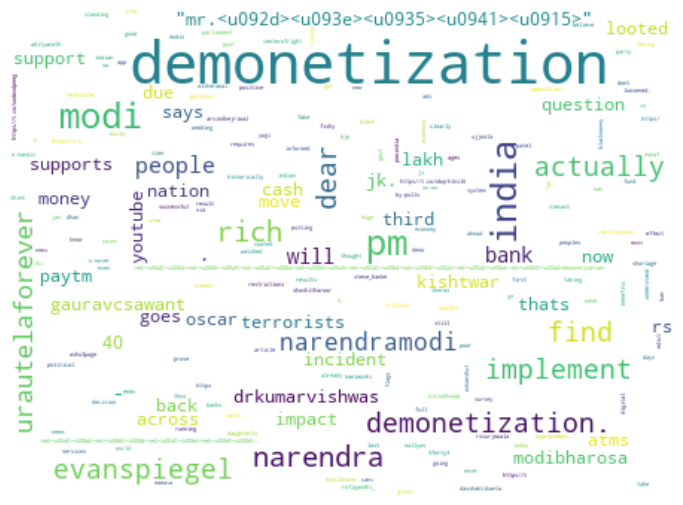

In [104]:
#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [92]:
def text_clean(text):
    text = re.sub(r'RT', '',text)
    text = re.sub(r'&amp;','&',text)
    text = re.sub(r'[?!;:@#-,]','',text)
    text = text.lower()
    return text
    

In [93]:
from wordcloud import STOPWORDS

In [94]:
print(STOPWORDS)

{'have', 'are', 'cannot', 'when', 'itself', 'whom', "doesn't", 'nor', 'with', 'yourself', "what's", 'k', 'this', 'during', 'is', 'he', "you've", "they'd", 'at', 'it', 'else', 'below', 'just', 'between', 'both', "i've", 'be', 'too', "couldn't", 'com', 'my', "here's", "hasn't", 'can', 'ourselves', "shan't", 'through', 'which', 'www', 'me', 'shall', "hadn't", 'such', 'herself', "who's", 'and', "you'd", 'but', "he'll", 'as', 'while', 'was', 'so', 'ought', "they're", 'you', "i'd", 'do', "when's", 'most', 'after', "haven't", 'once', 'since', 'then', 'more', 'them', "he's", 'again', 'been', 'from', 'not', 'like', 'to', 'had', 'against', 'she', 'myself', 'r', 'there', 'her', 'could', 'into', 'a', "they'll", 'they', 'those', 'http', 'further', 'only', 'being', 'who', "we'll", 'here', 'for', 'yourselves', "there's", 'therefore', 'the', "how's", 'no', 'until', 'what', "wasn't", 'why', 'their', 'in', 'by', 'did', 'some', 'before', "she'll", 'theirs', 'each', 'same', 'having', 'would', "i'll", 'on'

In [95]:
text = df.text.apply(lambda x: text_clean(x))

In [97]:
word_freq = frequency_of_words(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

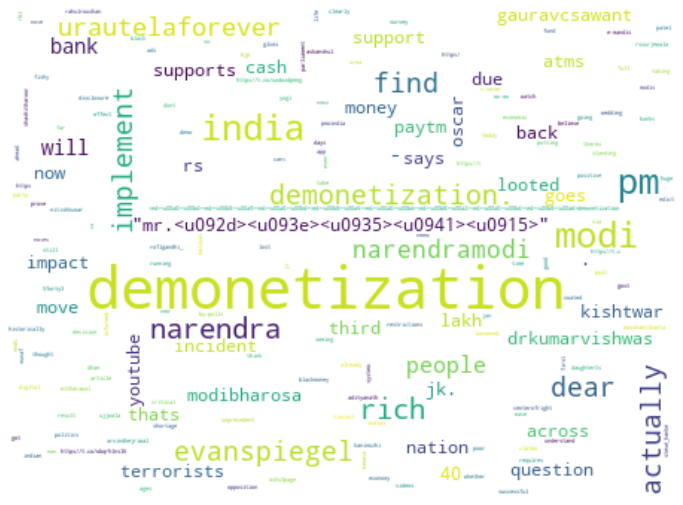

In [103]:
# wc = WordCloud(width=800, height=800, max_words=200, background_color='white').generate_from_frequencies(word_freq)
# plt.imshow(wc, interpolation = 'bilinear')
# plt.figure(figsize = (20,20))
# plt.axis('on')
# plt.show()

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()